In [1]:
import datetime
import os
import getpass

import matplotlib.pyplot as plt
import numpy as np

from sentinelhub import (
    SHConfig,
    CRS,
    BBox,
    DataCollection,
    DownloadRequest,
    MimeType,
    MosaickingOrder,
    SentinelHubDownloadClient,
    SentinelHubRequest,
    bbox_to_dimensions,
)

# The following is not a package. It is a file utils.py which should be in the same folder as this notebook.
from utils import plot_image

In [2]:
for collection in DataCollection.get_available_collections():
    print(collection)

DataCollection.SENTINEL2_L1C
DataCollection.SENTINEL2_L2A
DataCollection.SENTINEL1
DataCollection.SENTINEL1_IW
DataCollection.SENTINEL1_IW_ASC
DataCollection.SENTINEL1_IW_DES
DataCollection.SENTINEL1_EW
DataCollection.SENTINEL1_EW_ASC
DataCollection.SENTINEL1_EW_DES
DataCollection.SENTINEL1_EW_SH
DataCollection.SENTINEL1_EW_SH_ASC
DataCollection.SENTINEL1_EW_SH_DES
DataCollection.DEM
DataCollection.DEM_MAPZEN
DataCollection.DEM_COPERNICUS_30
DataCollection.DEM_COPERNICUS_90
DataCollection.MODIS
DataCollection.LANDSAT_MSS_L1
DataCollection.LANDSAT_TM_L1
DataCollection.LANDSAT_TM_L2
DataCollection.LANDSAT_ETM_L1
DataCollection.LANDSAT_ETM_L2
DataCollection.LANDSAT_OT_L1
DataCollection.LANDSAT_OT_L2
DataCollection.SENTINEL5P
DataCollection.SENTINEL3_OLCI
DataCollection.SENTINEL3_SLSTR
DataCollection.HARMONIZED_LANDSAT_SENTINEL


In [14]:

DataCollection.SENTINEL5P

<DataCollection.SENTINEL5P: DataCollectionDefinition(
  api_id: sentinel-5p-l2
  catalog_id: sentinel-5p-l2
  wfs_id: DSS7
  service_url: https://creodias.sentinel-hub.com
  collection_type: Sentinel-5P
  sensor_type: TROPOMI
  processing_level: L2
  bands: (Band(name='CO', units=(<Unit.DN: 'DN'>,), output_types=(<class 'numpy.float32'>,)), Band(name='HCHO', units=(<Unit.DN: 'DN'>,), output_types=(<class 'numpy.float32'>,)), Band(name='NO2', units=(<Unit.DN: 'DN'>,), output_types=(<class 'numpy.float32'>,)), Band(name='O3', units=(<Unit.DN: 'DN'>,), output_types=(<class 'numpy.float32'>,)), Band(name='SO2', units=(<Unit.DN: 'DN'>,), output_types=(<class 'numpy.float32'>,)), Band(name='CH4', units=(<Unit.PPB: 'PPB'>,), output_types=(<class 'numpy.float32'>,)), Band(name='AER_AI_340_380', units=(<Unit.INDEX: 'INDEX'>,), output_types=(<class 'numpy.float32'>,)), Band(name='AER_AI_354_388', units=(<Unit.INDEX: 'INDEX'>,), output_types=(<class 'numpy.float32'>,)), Band(name='CLOUD_BASE_PRES

In [4]:
from sentinelhub import SHConfig

config = SHConfig()
config.sh_client_id = 'sh-fe080851-d462-4304-9f4d-1b7fd7c7dc95'
config.sh_client_secret = 'XBnxUPfjs1duw9wmexDpoVmhTbY6piHw'
config.sh_base_url = 'https://sh.dataspace.copernicus.eu'
config.sh_token_url = 'https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token'

In [5]:
betsiboka_coords_wgs84 = (46.16, -16.15, 46.51, -15.58)

In [6]:
resolution = 60
betsiboka_bbox = BBox(bbox=betsiboka_coords_wgs84, crs=CRS.WGS84)
betsiboka_size = bbox_to_dimensions(betsiboka_bbox, resolution=resolution)

print(f"Image shape at {resolution} m resolution: {betsiboka_size} pixels")

Image shape at 60 m resolution: (631, 1047) pixels


In [7]:
evalscript_true_color = """
//VERSION=3

function setup() {
    return {
        input: [{
            bands: ["B02", "B03", "B04"]
        }],
        output: {
            bands: 3
        }
    };
}

function evaluatePixel(sample) {
    return [sample.B04, sample.B03, sample.B02];
}
"""

request = SentinelHubRequest(
    evalscript=evalscript_true_color,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L2A.define_from(
                "s2l2a", service_url=config.sh_base_url
            ),
            time_interval=("2020-06-12", "2020-06-13"),
        )
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    bbox=betsiboka_bbox,
    size=betsiboka_size,
    config=config,
)

In [8]:
print(request)

In [9]:
image = request.get_data()[0]

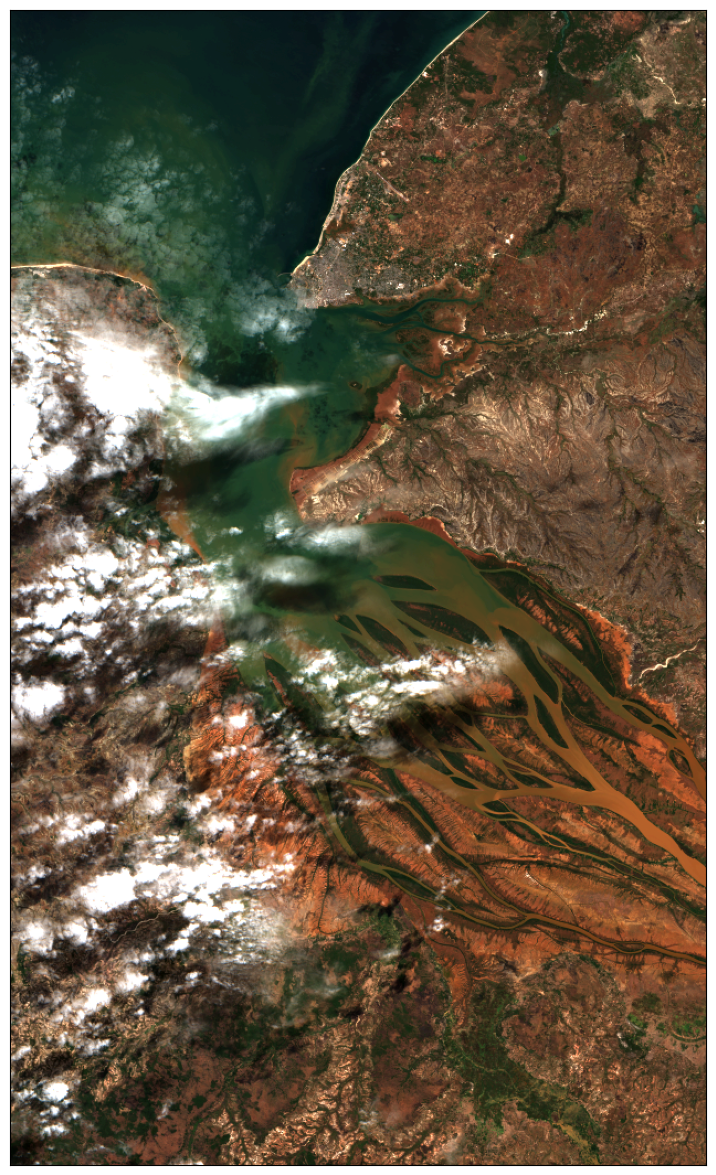

In [10]:

# The following is not a package. It is a file utils.py which should be in the same folder as this notebook.
from utils import plot_image

plot_image(image, factor=3.5 / 255, clip_range=(0, 1))

In [11]:
evalscript = """
//VERSION=3

return [VV, 2 * VH, VV / VH / 100.0, dataMask]
"""

time_interval = "2020-07-06", "2020-07-20"

request = SentinelHubRequest(
    evalscript=evalscript,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL1_IW_ASC.define_from(
                "s1grd", service_url=config.sh_base_url
            ),
            time_interval=time_interval,
        )
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    bbox=glacier_bbox,
    size=glacier_size,
    config=config,
)

image = request.get_data()[0]

plot_image(image, factor=3.5 / 255, clip_range=(0, 1))

NameError: name 'glacier_bbox' is not defined

In [ ]:
print(request)